<a href="https://colab.research.google.com/github/aravindhnaidu/Emotion_Recognization_datasets/blob/main/Emotion_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd

In [3]:

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import word_tokenize
from nltk.corpus import stopwords
import spacy
nlp = spacy.load("en_core_web_sm")
import warnings
warnings.filterwarnings('ignore')
import re
import string
import nltk
nltk.download('stopwords')


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
df = pd.read_csv('/Emotion_classify_Data.csv')
df

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear
...,...,...
5932,i begun to feel distressed for you,fear
5933,i left feeling annoyed and angry thinking that...,anger
5934,i were to ever get married i d have everything...,joy
5935,i feel reluctant in applying there because i w...,fear


In [13]:
print(df.Comment[5])

i feel jealous becasue i wanted that kind of love the true connection between two souls and i wanted that


In [14]:
for i in range(20,40):
    print(f"{i+1}: {df['Comment'][i]} -> {df['Emotion'][i]}")

21: i hope that the next quote will be able to let my special someone knows what im feeling insecure about and understand that no matter how much i trust -> fear
22: i feel much better and without the help of ice -> joy
23: i am sitting here typing this and wondering where i belong feeling distracted feeling comfortable feeling misunderstood and hurt -> anger
24: i still feel its a little shaky at times and can move into the slightly odd jades hair in particular seems prone to this but generally it works well with spencers writing -> fear
25: i stropped about for a bit feeling grumpy because i was missing out -> anger
26: i have a feeling i shall go mad -> anger
27: i am happpy when i get good results in the field of academics or athletics -> joy
28: i got the feeling brig is sincere and has a very strong desire to help others become successful both financially and also through building strengthening relationships through christianity -> joy
29: im feeling deeply overwhelmed by these o

In [15]:
df.isnull().sum()

Comment    0
Emotion    0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


In [18]:
df.Emotion.value_counts()

Emotion
anger    2000
joy      2000
fear     1937
Name: count, dtype: int64

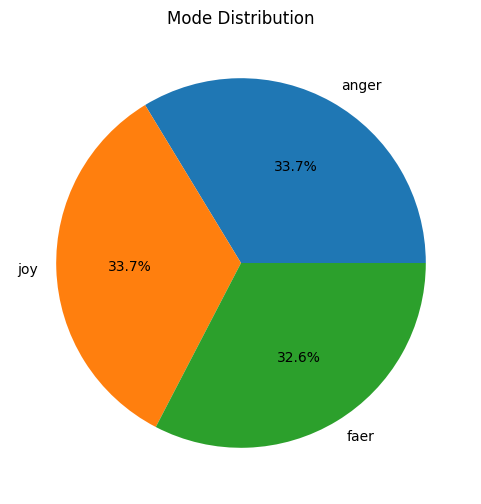

In [19]:
plt.figure(figsize=(6,6))
name = ['anger','joy','faer']
plt.pie(x = df.Emotion.value_counts(),labels=name ,autopct="%1.1f%%")
plt.title('Mode Distribution')
plt.show()

In [20]:
def preprocess_text(sen):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''

    sentence = sen.lower()
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # When we remove apostrophe from the word "Mark's", the apostrophe is replaced by an empty space. Hence, we are left with single character "s" that we are removing here.
    # Remove multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)  # Next, we remove all the single characters and replace it by a space which creates multiple spaces in our text. Finally, we remove the multiple spaces from our text as well.
    # Remove Stopwords
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    sentence = pattern.sub('', sentence)
    return sentence

In [21]:
new_Comment = []
sentences = list(df.Comment)
for i in sentences:
    new_Comment.append(preprocess_text(i))

In [22]:
new_Comment[5]

'feel jealous becasue wanted kind love true connection two souls wanted '

In [23]:
df['new_Comment'] = new_Comment
df

,Comment,Emotion,new_Comment
0,i seriously hate one subject to death but now ...,fear,seriously hate one subject death feel reluctan...
1,im so full of life i feel appalled,anger,im full life feel appalled
2,i sit here to write i start to dig out my feel...,fear,sit write start dig feelings think afraid acce...
3,ive been really angry with r and i feel like a...,joy,ive really angry feel like idiot trusting firs...
4,i feel suspicious if there is no one outside l...,fear,feel suspicious one outside like rapture happe...
...,...,...,...
5932,i begun to feel distressed for you,fear,begun feel distressed
5933,i left feeling annoyed and angry thinking that...,anger,left feeling annoyed angry thinking center stu...
5934,i were to ever get married i d have everything...,joy,ever get married everything ready offer got to...
5935,i feel reluctant in applying there because i w...,fear,feel reluctant applying want able find company...


In [24]:
encoder = LabelEncoder()
df.Emotion = encoder.fit_transform(df.Emotion)

In [25]:
x = df.drop(["Comment","Emotion"],axis=True)
y = df.Emotion

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df['new_Comment'], df['Emotion'],
                                                    test_size=0.2, random_state=42, stratify=df['Emotion'])

In [27]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4749,)
Shape of X_test:  (1188,)


In [28]:
v = TfidfVectorizer()

X_train_cv = v.fit_transform(X_train)
X_test_cv = v.transform(X_test)

# All TfidfVectorizer vocabularies
print(v.vocabulary_)

{'thrilled': 6881, 'lot': 4043, 'things': 6864, 'feel': 2518, 'petrified': 4938, 'feeling': 2520, 'grouchy': 2989, 'old': 4664, 'man': 4110, 'mentioned': 4229, 'retail': 5653, 'therapy': 6848, 'great': 2965, 'ive': 3624, 'feelin': 2519, 'cranky': 1501, 'blog': 713, 'im': 3355, 'still': 6464, 'bit': 671, 'childish': 1099, 'already': 204, 'dont': 1976, 'know': 3783, 'address': 94, 'something': 6274, 'else': 2158, 'like': 3949, 'petty': 4941, 'murder': 4423, 'shoudlnt': 6044, 'punished': 5307, 'nearly': 4484, 'heavily': 3144, 'human': 3290, 'beings': 605, 'constantly': 1374, 'shitty': 6021, 'changed': 1046, 'office': 4651, 'another': 276, 'room': 5723, 'without': 7591, 'agreement': 159, 'issues': 3614, 'obvious': 4628, 'went': 7490, 'chinese': 1105, 'yesterday': 7696, 'hostile': 3268, 'towards': 6980, 'get': 2849, 'away': 473, 'days': 1647, 'gag': 2788, 'line': 3965, 'sarcastic': 5802, 'sorry': 6298, 'anyone': 296, 'fortunate': 2700, 'enough': 2239, 'born': 768, 'mexican': 4253, 'compare'

In [29]:
NB_model = MultinomialNB()

# Model training
NB_model.fit(X_train_cv, y_train)
y_pred = NB_model.predict(X_test_cv)
# Print accuracy score
print(accuracy_score(y_test, y_pred))

0.8897306397306397


In [30]:
RFC_model = RandomForestClassifier()

RFC_model.fit(X_train_cv, y_train)

# Get the predictions for X_test and store it in y_pred
y_pred = RFC_model.predict(X_test_cv)
# Print Accuracy
print(accuracy_score(y_test, y_pred))

0.9385521885521886


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       400
           1       0.92      0.95      0.93       388
           2       0.95      0.96      0.96       400

    accuracy                           0.94      1188
   macro avg       0.94      0.94      0.94      1188
weighted avg       0.94      0.94      0.94      1188

